In [1]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors



In [2]:

# set grey layout with white grid for all plots
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
ggplot_styles = {'axes.facecolor': '8d8d8d',} 
plt.rcParams.update(ggplot_styles)

In [157]:

file_url = r'MERGEVALUEFOODHOUSEHOLDNSS68.csv'
merge= pd.read_csv(file_url)
#We make a copy of the file and work on it
merge= merge.copy()
merge.columns

Index(['HHID', 'Sector', 'HH_Size', 'Religion', 'Social_Group',
       'whether_Land_owned', 'State_code', 'Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat', 'beer', 'chicken',
       'coffee, tea, juice', 'country liquor', 'edible oil', 'eggs',
       'fish, prawn', 'foreign/ refined liquor or wine', 'fruits_dry',
       'fruits_fresh', 'goat meat /mutton', 'packaged processed food', 'pan',
       'pork', 'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables'],
      dtype='object')

# A. Encoding 

In [158]:
merge.dtypes


HHID                                 int64
Sector                              object
HH_Size                              int64
Religion                            object
Social_Group                        object
whether_Land_owned                  object
State_code                          object
Regular_salary_earner               object
Possess_ration_card                 object
MPCE_MRP                             int64
Cereal                             float64
Milk & Milk Products               float64
Pulses and Pulse Products          float64
beef / buffalo meat                float64
beer                               float64
chicken                            float64
coffee, tea, juice                 float64
country liquor                     float64
edible oil                         float64
eggs                               float64
fish, prawn                        float64
foreign/ refined liquor or wine    float64
fruits_dry                         float64
fruits_fres

In [164]:
merge.columns


Index(['HHID', 'Sector', 'HH_Size', 'Religion', 'Social_Group',
       'whether_Land_owned', 'State_code', 'Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat', 'beer', 'chicken',
       'coffee, tea, juice', 'country liquor', 'edible oil', 'eggs',
       'fish, prawn', 'foreign/ refined liquor or wine', 'fruits_dry',
       'fruits_fresh', 'goat meat /mutton', 'packaged processed food', 'pan',
       'pork', 'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables'],
      dtype='object')

In [159]:
merge_encode=merge
merge_encode=merge_encode.drop(['HHID'], axis=1)


## 1. Encoding non-numeric data

In [160]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
for col in ['Sector', 'HH_Size', 'Religion', 'Social_Group', 'whether_Land_owned',
       'State_code', 'Regular_salary_earner', 'Possess_ration_card',
       'MPCE_MRP' ]:
    merge_encode[col] = lbl_encoder.fit_transform(merge_encode[col])
merge_encode

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
0,0,4,1,3,1,22,0,1,26571,750.0,300.0,120.0,140.0,NaN,210.0,130.0,240.0,90.0,24.0,290.0,NaN,20.0,95.0,NaN,120.0,120.0,150.0,142.0,90.0,270.0,NaN,470.0
1,0,1,1,3,1,22,0,1,58863,270.0,212.0,60.0,280.0,200.0,270.0,110.0,NaN,88.0,NaN,170.0,NaN,30.0,80.0,NaN,70.0,120.0,150.0,89.0,59.0,258.0,NaN,390.0
2,0,1,1,3,1,22,0,1,53483,374.0,65.0,60.0,NaN,NaN,100.0,110.0,240.0,90.0,100.0,240.0,NaN,NaN,62.0,NaN,139.0,65.0,160.0,114.0,73.0,300.0,NaN,290.0
3,0,0,3,3,1,22,0,1,74690,140.0,240.0,45.0,140.0,NaN,160.0,80.0,300.0,45.0,NaN,190.0,NaN,NaN,55.0,NaN,60.0,65.0,150.0,57.0,67.0,264.0,NaN,288.0
4,0,5,1,3,1,22,0,1,8717,869.0,95.0,90.0,NaN,NaN,100.0,145.0,240.0,110.0,46.0,360.0,NaN,NaN,80.0,NaN,105.0,53.0,130.0,141.0,75.0,60.0,NaN,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100493,1,2,3,0,0,26,1,1,75454,576.0,516.0,167.0,NaN,NaN,110.0,408.0,NaN,290.0,69.0,180.0,NaN,NaN,185.0,200.0,55.0,NaN,NaN,80.0,266.0,NaN,NaN,364.0
100494,1,2,3,0,0,26,0,0,79576,610.0,1535.0,222.0,NaN,NaN,220.0,278.0,NaN,195.0,66.0,170.0,NaN,NaN,123.0,NaN,12.0,NaN,NaN,103.0,144.0,1050.0,NaN,214.0
100495,1,5,3,0,1,26,1,1,46144,920.0,1120.0,362.0,NaN,NaN,275.0,427.0,NaN,375.0,96.0,250.0,NaN,NaN,359.0,NaN,235.0,NaN,NaN,79.0,330.0,NaN,NaN,617.0
100496,1,2,3,0,1,26,1,1,58709,593.0,815.0,212.0,NaN,NaN,115.0,316.0,NaN,314.0,66.0,240.0,NaN,NaN,153.0,100.0,155.0,NaN,NaN,82.0,260.0,NaN,NaN,373.0


In [42]:
merge_encode.count()

Sector                             100498
HH_Size                            100498
Religion                           100498
Social_Group                       100498
whether_Land_owned                 100498
State_code                         100498
Regular_salary_earner              100498
Possess_ration_card                100498
MPCE_MRP                           100498
Cereal                              98950
Milk & Milk Products                87334
Pulses and Pulse Products           97620
beef / buffalo meat                  9626
beer                                 2140
chicken                             40571
coffee, tea, juice                  97680
country liquor                       8066
edible oil                          98336
eggs                                43809
fish, prawn                         37205
foreign/ refined liquor or wine      5713
fruits_dry                          38669
fruits_fresh                        85009
goat meat /mutton                 

## 2. Missing data imputation: remplacer NAN PAR ZERO 

In [161]:
merge_encode_zero=merge_encode.replace(np.nan,0)
merge_encode_zero

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
0,0,4,1,3,1,22,0,1,26571,750.0,300.0,120.0,140.0,0.0,210.0,130.0,240.0,90.0,24.0,290.0,0.0,20.0,95.0,0.0,120.0,120.0,150.0,142.0,90.0,270.0,0.0,470.0
1,0,1,1,3,1,22,0,1,58863,270.0,212.0,60.0,280.0,200.0,270.0,110.0,0.0,88.0,0.0,170.0,0.0,30.0,80.0,0.0,70.0,120.0,150.0,89.0,59.0,258.0,0.0,390.0
2,0,1,1,3,1,22,0,1,53483,374.0,65.0,60.0,0.0,0.0,100.0,110.0,240.0,90.0,100.0,240.0,0.0,0.0,62.0,0.0,139.0,65.0,160.0,114.0,73.0,300.0,0.0,290.0
3,0,0,3,3,1,22,0,1,74690,140.0,240.0,45.0,140.0,0.0,160.0,80.0,300.0,45.0,0.0,190.0,0.0,0.0,55.0,0.0,60.0,65.0,150.0,57.0,67.0,264.0,0.0,288.0
4,0,5,1,3,1,22,0,1,8717,869.0,95.0,90.0,0.0,0.0,100.0,145.0,240.0,110.0,46.0,360.0,0.0,0.0,80.0,0.0,105.0,53.0,130.0,141.0,75.0,60.0,0.0,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100493,1,2,3,0,0,26,1,1,75454,576.0,516.0,167.0,0.0,0.0,110.0,408.0,0.0,290.0,69.0,180.0,0.0,0.0,185.0,200.0,55.0,0.0,0.0,80.0,266.0,0.0,0.0,364.0
100494,1,2,3,0,0,26,0,0,79576,610.0,1535.0,222.0,0.0,0.0,220.0,278.0,0.0,195.0,66.0,170.0,0.0,0.0,123.0,0.0,12.0,0.0,0.0,103.0,144.0,1050.0,0.0,214.0
100495,1,5,3,0,1,26,1,1,46144,920.0,1120.0,362.0,0.0,0.0,275.0,427.0,0.0,375.0,96.0,250.0,0.0,0.0,359.0,0.0,235.0,0.0,0.0,79.0,330.0,0.0,0.0,617.0
100496,1,2,3,0,1,26,1,1,58709,593.0,815.0,212.0,0.0,0.0,115.0,316.0,0.0,314.0,66.0,240.0,0.0,0.0,153.0,100.0,155.0,0.0,0.0,82.0,260.0,0.0,0.0,373.0


In [162]:
merge_encode_zero.describe()

,Sector,HH_Size,Religion,Social_Group,whether_Land_owned,State_code,Regular_salary_earner,Possess_ration_card,MPCE_MRP,Cereal,Milk & Milk Products,Pulses and Pulse Products,beef / buffalo meat,beer,chicken,"coffee, tea, juice",country liquor,edible oil,eggs,"fish, prawn",foreign/ refined liquor or wine,fruits_dry,fruits_fresh,goat meat /mutton,packaged processed food,pan,pork,salt & sugar,spices,tobacco,toddy,vegetables
count,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000,100498.000000
mean,0.409272,3.589196,2.152182,1.031225,0.866176,19.157864,0.304275,0.798503,40829.806305,799.916526,654.094062,209.240064,26.692939,5.932884,77.213437,138.536588,18.832982,244.350942,26.348584,108.744433,25.454198,36.483293,134.456546,54.132759,120.753328,32.804941,19.714084,125.998846,144.107604,74.814464,2.470577,333.907560
std,0.491702,2.221401,0.794762,1.042811,0.340464,10.537995,0.460102,0.401120,24084.000372,508.856379,793.593552,146.455223,107.116479,55.480521,131.184961,145.262168,104.879813,160.992074,45.386059,244.430415,149.051735,89.508397,176.883488,174.134561,149.272450,98.772635,105.549352,106.571088,90.151119,155.061524,30.347107,218.868949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,0.000000,1.000000,12.000000,0.000000,1.000000,20122.250000,457.000000,158.000000,111.000000,0.000000,0.000000,0.000000,47.000000,0.000000,140.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,0.000000,62.000000,87.000000,0.000000,0.000000,194.000000
50%,0.000000,3.000000,2.000000,1.000000,1.000000,20.000000,0.000000,1.000000,39576.000000,712.000000,440.000000,181.000000,0.000000,0.000000,0.000000,95.000000,0.000000,220.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,75.000000,0.000000,0.000000,102.000000,126.000000,5.000000,0.000000,288.000000
75%,1.000000,5.000000,2.000000,2.000000,1.000000,30.000000,1.000000,1.000000,61181.750000,1034.000000,900.000000,275.000000,0.000000,0.000000,120.000000,180.000000,0.000000,320.000000,40.000000,120.000000,0.000000,35.000000,177.000000,0.000000,155.000000,12.000000,0.000000,160.000000,180.000000,90.000000,0.000000,418.000000
max,1.000000,19.000000,7.000000,3.000000,1.000000,34.000000,1.000000,1.000000,85184.000000,7600.000000,19800.000000,2587.000000,3660.000000,3000.000000,3900.000000,3020.000000,4000.000000,4215.000000,800.000000,4800.000000,4000.000000,2460.000000,4130.000000,7500.000000,3706.000000,2500.000000,2400.000000,3930.000000,1697.000000,3270.000000,1500.000000,3814.000000


#transformer valeur en 0 et 1 6 SORTE DE ENCODING

Y=['Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat(Kg)', 'beer (l.)',
       'chicken(Kg)', 'coffee, tea, juice', 'country liquor (l.)',
       'edible oil', 'eggs(no)', 'fish, prawn(Kg)', 'food non-veg',
       'foreign/ refined liquor or wine (l.)', 'fruits (dry)', 'fruits(fresh)',
       'goat meat /mutton(Kg)', 'packaged processed food', 'pan', 'pork(Kg)',
       'salt & sugar', 'spices', 'tobacco', 'toddy (l.)', 'vegetables']
for col in Y :
      merge_encode_one[col]= np.where(merge_encode_one[col]== 0, 0, 1)

merge_encode_one.head(2)
X=merge_encode_one


## Clustering with PCA and Kmeans -only items food

In [165]:
X=merge_encode_zero[['Regular_salary_earner',
       'Possess_ration_card', 'MPCE_MRP', 'Cereal', 'Milk & Milk Products',
       'Pulses and Pulse Products', 'beef / buffalo meat', 'beer', 'chicken',
       'coffee, tea, juice', 'country liquor', 'edible oil', 'eggs',
       'fish, prawn', 'foreign/ refined liquor or wine', 'fruits_dry',
       'fruits_fresh', 'goat meat /mutton', 'packaged processed food', 'pan',
       'pork', 'salt & sugar', 'spices', 'tobacco', 'toddy', 'vegetables']]




In [166]:

from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X)
df_pca = pca.transform(X)
df_pca.shape

(100498, 1)

In [150]:
df_pca

array([[ 27915.89259681],
       [ 30751.52826155],
       [-29178.49034977],
       ...,
       [ 27231.84480739],
       [ 30407.98434634],
       [-16776.53370237]])

In [167]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,2)]) #on choisit 2 PCA
df_pca

,PC1
0,-14261.419531
1,18026.248867
2,12644.874874
3,33851.638330
4,-32116.738112
...,...
100493,34620.625438
100494,38753.478847
100495,5321.921139
100496,17880.433493


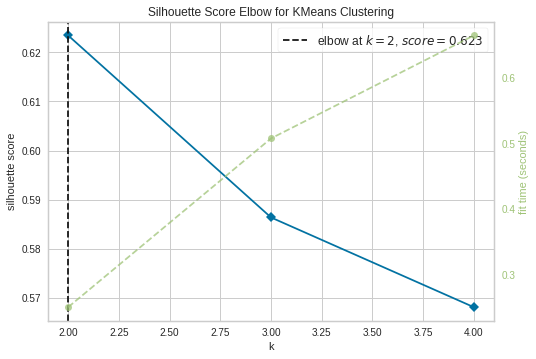

In [168]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,5), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()

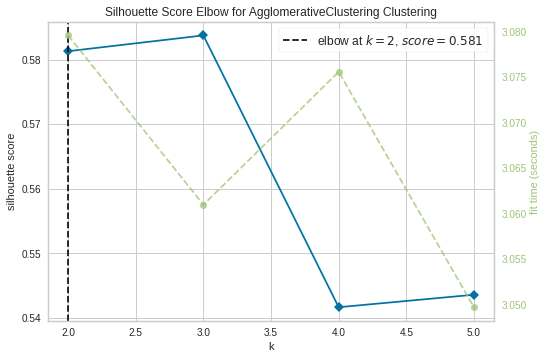

In [153]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

agc = AgglomerativeClustering()

visualizer = KElbowVisualizer(estimator = agc, k = (2,6), metric='silhouette')
visualizer.fit(df_pca)
visualizer.poof()

In [146]:
# find the optimal numbers of clusters with GAUSSIAN
from sklearn.mixture import GaussianMixture

dict_model={}
for i in range (2,5):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(df_pca)
    key="gmm"+str(i)
    dict_model[key] = gmm.predict(df_pca)

dict_model

{'gmm2': array([1, 1, 1, ..., 1, 1, 1]),
 'gmm3': array([2, 2, 2, ..., 1, 2, 2]),
 'gmm4': array([0, 1, 2, ..., 2, 0, 1])}

In [156]:
def unsupervised_metrics(X, y_pred):

    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)

for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])
    


 gmm2
Silhouette Coefficient: 0.059
Variance Ratio Criterion: 615.415

 gmm3
Silhouette Coefficient: -0.051
Variance Ratio Criterion: 480.517

 gmm4
Silhouette Coefficient: -0.101
Variance Ratio Criterion: 352.632


In [169]:
from sklearn.cluster import KMeans
model = KMeans(2) 
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)

k_centers = model.cluster_centers_

merge_encode_zero["Cluster_consumer"]=y_pred
merge["Cluster_consumer"]=y_pred

from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)
silhouette_score(df_pca, y_pred)


0.6234353873777455

In [175]:
merge['Cluster_consumer_Centroid0'] = merge['Cluster_consumer'].apply(lambda label: model.cluster_centers_[label][0])
merge['Cluster_consumer_Centroid1'] = merge['Cluster_consumer'].apply(lambda label: model.cluster_centers_[label][1])




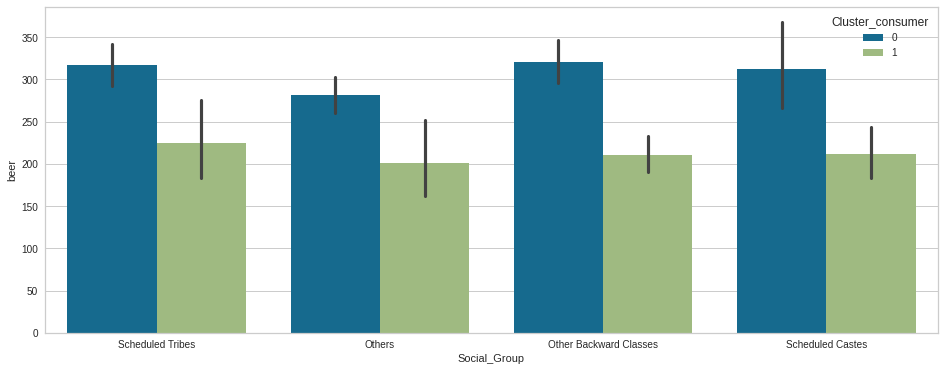

In [181]:
plt.figure(figsize=(16, 6))
colors = ["#A181E0", "#E08181"]
ax = sns.barplot(data=merge, x="Social_Group", y="beer", hue='Cluster_consumer')
#ax = sns.scatterplot(data=merge, x="Cluster_consumer_Centroid0", y="Cluster_consumer_Centroid1", hue='Cluster_consumer', 
                     #s=1000, palette=colors, legend=False, alpha=0.1)


## Clustering the social background

In [170]:
W=merge_encode_zero[['Sector', 'HH_Size', 'Religion', 'whether_Land_owned', "Social_Group",
       'State_code', 'Regular_salary_earner']]
W.head()



,Sector,HH_Size,Religion,whether_Land_owned,Social_Group,State_code,Regular_salary_earner
0,0,4,1,1,3,22,0
1,0,1,1,1,3,22,0
2,0,1,1,1,3,22,0
3,0,0,3,1,3,22,0
4,0,5,1,1,3,22,0


In [171]:
from sklearn.decomposition import PCA

pca2 = PCA(0.95)
pca2.fit(W)
df_pca2 = pca2.transform(W)
df_pca2.shape

(100498, 2)

In [172]:
df_pca2 = pd.DataFrame(df_pca2, columns = ['PC'+str(i) for i in range(1,3)]) #on choisit 2 PCA
df_pca2

,PC1,PC2
0,-2.843281,0.406433
1,-2.834194,-2.589838
2,-2.834194,-2.589838
3,-2.832342,-3.539123
4,-2.846311,1.405190
...,...,...
100493,-6.835692,-1.644133
100494,-6.837145,-1.638063
100495,-6.846314,1.385274
100496,-6.837227,-1.610996


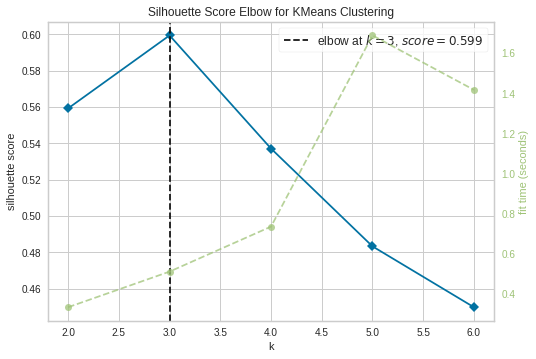

In [173]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,7), metric='silhouette') #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca2)
visualizer.poof()

In [174]:
from sklearn.cluster import KMeans
model2 = KMeans(3) 
model2.fit(df_pca2) #ON fIT 
y_pred2 = model2.predict(df_pca2)

k_centers2 = model2.cluster_centers_

merge_encode_zero["Cluster_Social"]=y_pred2
merge["Cluster_Social"]=y_pred2


0.007637875740963937

In [ ]:

from sklearn.metrics import silhouette_score

silhouette_score(df_pca2, y_pred2)
silhouette_score(W, y_pred2)

## GRAPH OF CLUSTERS (from 2 clustering with Kmeans, cluster_consumer, cluster_social) 

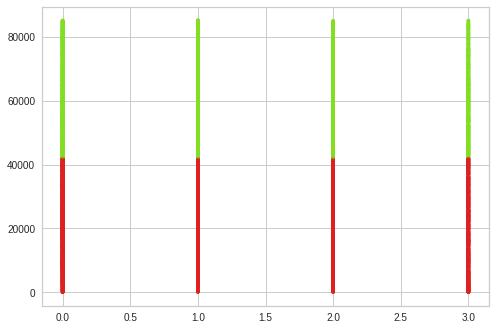

In [137]:
#FOR 2 CLUSTERS : TWO COLORS
colors1 = ['#DF2020', '#81DF20' ]
colors2 = ['#gf2670', '#41DF56', '#41DF56' ]
merge['color_cluster_consumer'] = merge.Cluster_consumer.map({0:colors1[0], 1:colors1[1]})
merge['color_cluster_social'] = merge.Cluster_Social.map({0:colors2[0], 1:colors2[1], 2:colors2[2]})

import matplotlib.pyplot as plt
plt.scatter(merge['Social_group'], merge["MPCE_MRP"], c=merge.color_cluster_consumer, alpha = 0.6, s=10)


In [ ]:
# assign cluster variables
Cluster_consumer0 = merge[merge['Cluster_consumer']==0]
Cluster_consumer1 = merge[merge['Cluster_consumer']==1]


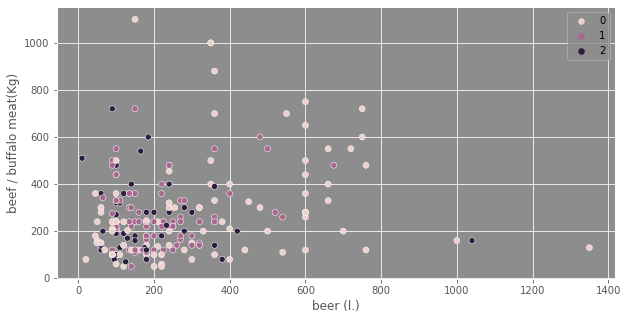

In [ ]:
#hue=merge['Cluster_consumer'],

fig, ax = plt.subplots()
sns.scatterplot(data=merge, x='beer', y='beef / buffalo meat', hue=y_pred, cmap='viridis', ax=ax)
plt.title('XXXX')
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()


In [ ]:
pd.crosstab(merge.Religion, merge.Cluster_consumer, normalize='columns')

<AxesSubplot:xlabel='cluster', ylabel='Religion'>

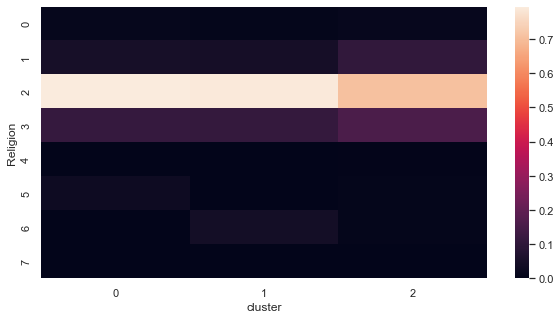

In [ ]:

import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(merge.Religion, merge.Cluster_consumer, normalize='columns'))


In [ ]:
merge.groupby(['Cluster_consumer'])['Religion'].value_counts()

In [ ]:
merge.groupby(['Cluster_consumer'])['Social_Group'].value_counts()

cluster  Social_Group
0        0                8670
         1                6740
         3                3033
         2                2837
1        0               15644
         1               11788
         2                8031
         3                3721
2        0               15518
         1               13801
         3                6815
         2                4807
Name: Social_Group, dtype: int64

In [ ]:
merge.Cluster_consumer.value_counts()

2    40941
1    39184
0    21280
Name: cluster, dtype: int64

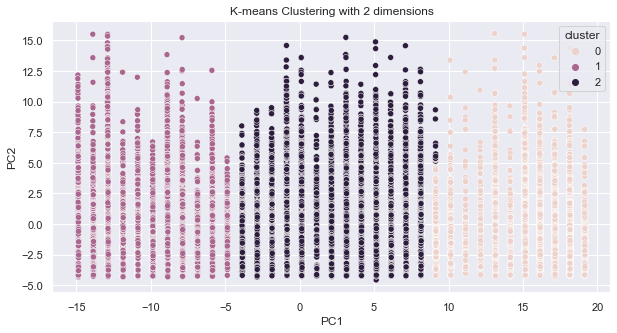

In [ ]:
sns.scatterplot(x="PC1", y="PC2", hue=merge['Cluster_consumer'], data=df_pca )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

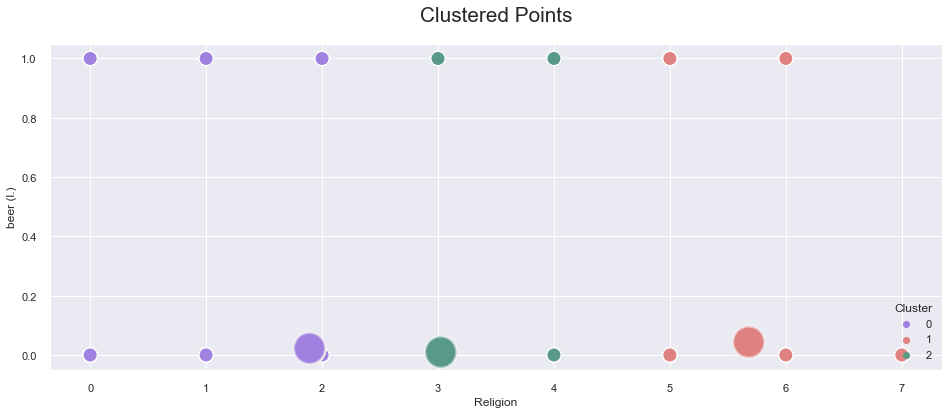

In [ ]:
merge_encode_one.groupby(['cluster'])['Religion'].value_counts()

cluster  Religion
0        2           28943
         3            6432
         1            4243
         0             569
         5             297
         6             270
         4             184
         7               2
1        2           31020
         3            4267
         1            1790
         6            1670
         0             303
         4             115
         5              18
         7               1
2        2           16932
         3            2395
         1            1013
         5             635
         0             217
         6              66
         4              23
Name: Religion, dtype: int64

## CLUSTERING WITH DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dict_model={}
k=0
for eps in range (1,5):
    for min_samples in range (2,5):
        k=k+1
        db = DBSCAN(eps=eps/100, min_samples=min_samples)
        print("db"+str(k))
        print(db)
        db.fit(X)
        key="db"+str(k)
        dict_model[key] = db.labels_
        cl=len(np.unique(db.labels_))
        print("number of clusters: ", cl )
    


dict_model

db1
DBSCAN(eps=0.01, min_samples=2)
number of clusters:  1168
db2
DBSCAN(eps=0.01, min_samples=3)
number of clusters:  755
db3
DBSCAN(eps=0.01, min_samples=4)
number of clusters:  531
db4
DBSCAN(eps=0.02, min_samples=2)
number of clusters:  1168
db5
DBSCAN(eps=0.02, min_samples=3)
number of clusters:  755
db6
DBSCAN(eps=0.02, min_samples=4)
number of clusters:  531
db7
DBSCAN(eps=0.03, min_samples=2)
number of clusters:  1168
db8
DBSCAN(eps=0.03, min_samples=3)
number of clusters:  755
db9
DBSCAN(eps=0.03, min_samples=4)
number of clusters:  531
db10
DBSCAN(eps=0.04, min_samples=2)
number of clusters:  1168
db11
DBSCAN(eps=0.04, min_samples=3)
number of clusters:  755
db12
DBSCAN(eps=0.04, min_samples=4)
number of clusters:  531


{'db1': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db2': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db3': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db4': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db5': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db6': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db7': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db8': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db9': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64),
 'db10': array([  0,   1,   2, ..., 133, 415, 485], dtype=int64),
 'db11': array([  0,   1,  -1, ..., 116, 347, 395], dtype=int64),
 'db12': array([ -1,   0,  -1, ..., 107, 295, 328], dtype=int64)}

In [ ]:
def unsupervised_metrics(X, y_pred):
    """
    Function to evaluate models based on different metrics:
    Homogeneity, Completeness, V-measure, adjusted_rand, AMI, 
    Silhouette Coefficient, Variance Ratio Criterion, Fowlkes Mallows
    
    """
    from sklearn import metrics
    from sklearn.metrics import silhouette_score, calinski_harabasz_score

    score_ss = metrics.silhouette_score(X, y_pred)
    score_vrc = metrics.calinski_harabasz_score(X, y_pred)
    
    print("Silhouette Coefficient: %0.3f" % score_ss)
    print('Variance Ratio Criterion: %0.3f' % score_vrc)

In [ ]:
for key in dict_model:
    print('\n', key)
    unsupervised_metrics(X=X, y_pred=dict_model[key])

In [ ]:
# fitting to splot

dbs= DBSCAN(eps=0.01, min_samples=2)
dbs.fit(X)
y_dbs = dbs.labels_ #y-pred=kmeans.labels_
#cl=y_dbs.nunique() #nombre de labels

data['dbs_cluster'] = dbs.labels_

fig, ax = plt.subplots()

plt.scatter(data=data, x='Household size', y='TV 8 radio services_30',c = y_dbs, cmap='viridis')

plt.show()

# GRAPH

In [ ]:
data['dbs_cluster'] = dbs.labels_
clusters = data['dbs_cluster'].reset_index()
clusters

In [ ]:
model = KMeans(4) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)
y_pred



In [ ]:
np.unique(y_pred, return_counts=True)

In [ ]:
k_centers = model.cluster_centers_

In [ ]:
data_encoder['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)



In [ ]:
merge.groupby(['cluster'])['Religion'].value_counts()

In [ ]:
merge.cluster.value_counts()

In [ ]:
merge.groupby(['cluster'])['Social_Group'].value_counts()

In [ ]:

fig, ax = plt.subplots()
sns.scatterplot(data=data_encoder, x='Household usual monthly consumer expenditure(Rs.)', y='electrical and lighting__365days', hue=y_pred, palette=['yellow', 'blue', 'red', 'green'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

In [ ]:
sns.scatterplot(x="Milk & Milk Products", y="MPCE_MRP", hue=merge['cluster'], data=merge )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
sns.scatterplot(x="beef / buffalo meat(Kg)", y="country liquor (l.)", hue=merge['cluster'], data=merge )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
sns.scatterplot(x="Social_Group", y="Sector", hue=merge['cluster'], data=merge )
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import plotly_express as px
px.bar(data_frame = merge, x = 'Religion', y = 'State_code', color = 'cluster', orientation= "h")

In [ ]:
# LES LABELS DANS LA TABLE NON ENCODEE
data = pd.read_csv(r'C:\Users\Lenovo\Documents\INDE DATA\caste_durable.csv')

In [ ]:
data['cluster'] = model.labels_

In [ ]:
import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(data.Religion, data.cluster, normalize='columns'))

In [ ]:
data.groupby(['cluster']).mean()

model = KMeans(4) #4 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)
y_pred

np.unique(y_pred, return_counts=True)

k_centers = model.cluster_centers_

data_encoder['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)


fig, ax = plt.subplots()
sns.scatterplot(data=data_encoder, x='Household usual monthly consumer expenditure(Rs.)', y='electrical and lighting__365days', hue=y_pred, palette=['yellow', 'blue', 'red', 'green'], ax=ax)
#sns.scatterplot(x=k_centers[:, 0], y=k_centers[:, 1], palette='blue', size=200, ax=ax)
#plt.scatter(k_centers[:, 0], k_centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

data_encoder.head()

# LES LABELS DANS LA TABLE NON ENCODEE
data = pd.read_csv(r'C:\Users\Lenovo\Documents\INDE DATA\caste_durable.csv')

data['cluster'] = model.labels_

import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(data.Religion, data.cluster, normalize='columns'))

data.groupby(['cluster']).mean()